In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

reading the network file : ComNet_all.csv

number of nodes, n  = 1474
number of edges, m  = 21867
mean degree,    <k> = 29.67
clustering coefficient, C     =  0.19
mean geodesic distance, <ell> =  2.08


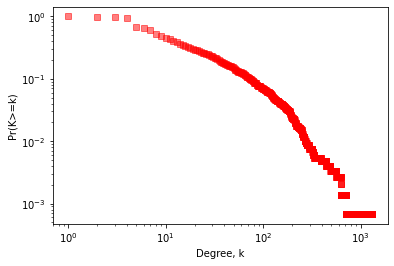

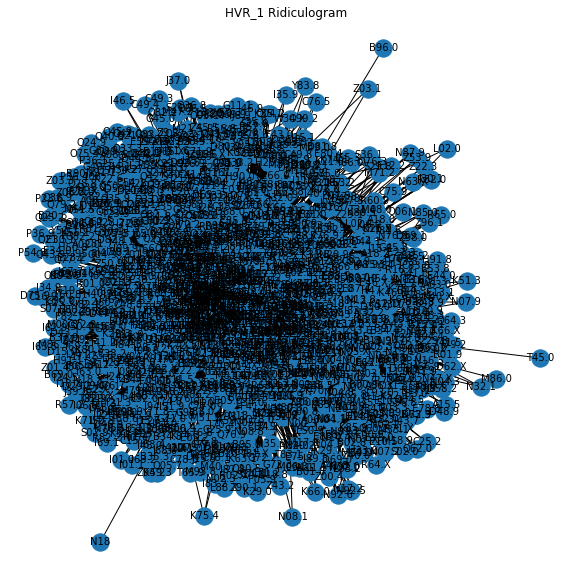

In [3]:
fname1 = 'ComNet_all.csv'

# read in the network file (an edge list)
print(f'reading the network file : {fname1}\n')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings)

# YOUR CODE HERE
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
kmean = 2*m/n
C = nx.transitivity(G)
ellmean = nx.average_shortest_path_length(G)
degrees = nx.degree(G)
kis = [k for _,k in degrees]

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

plot_CCDF(kis)

plt.figure(1, figsize=(10,10))
plt.title("HVR_1 Ridiculogram")
pos = nx.spring_layout(G)
nx.draw(G, pos)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()

In [8]:
#recreate results from net_all_ages.csv file
z = {} #holds the data we are trying to recereate
node_vals = list(G.nodes().keys())
node_data = {}
between = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
for i in range(len(node_vals)):
    z[i] = (node_vals[i], nx.clustering(G, node_vals[i]), nx.eccentricity(G, node_vals[i]), G.degree[node_vals[i]], between[node_vals[i]], closeness[node_vals[i]], G.degree[node_vals[i]], list(G.neighbors(node_vals[i])) != [])


In [10]:
#dict: Columns -> NodeName, ClusterinCoeff, Eccentricty, NumberOfEdges, betweeness centrality, closeness centrality, degree, is Single Node
print(z)

{0: ('Q24.8', 0.09412693794422046, 3, 491, 0.035844350678690476, 0.5997557003257329, 491, True), 1: ('C38.0', 0.4339622641509434, 3, 107, 0.0010512559747800619, 0.5175685172171469, 107, True), 2: ('Q21.1', 0.2140077821011673, 3, 258, 0.005612048499415681, 0.5471768202080238, 258, True), 3: ('Q25.0', 0.2795031055900621, 3, 161, 0.002335120916730227, 0.5249465431218817, 161, True), 4: ('Z01.7', 0.02207630282727391, 2, 1324, 0.4845834493323275, 0.908138101109741, 1324, True), 5: ('Q20.1', 0.4835423197492163, 3, 88, 0.00034505506307960126, 0.5096885813148789, 88, True), 6: ('I49.8', 0.05958174509944941, 2, 708, 0.07162348099373647, 0.6581769436997319, 708, True), 7: ('Q21.2', 0.5164556962025316, 3, 80, 0.00010587702182783005, 0.5079310344827587, 80, True), 8: ('Q27.8', 0.7095238095238096, 3, 36, 2.1006816013382488e-05, 0.49662845583277143, 36, True), 9: ('R57.0', 0.2416514875531269, 3, 244, 0.004738030525578004, 0.5368075801749271, 244, True), 10: ('Q22.4', 0.5721311475409836, 3, 61, 5.886